### Import Library

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

### Load Data

In [21]:
df = pd.read_csv("D:\Research\data\solarenergy.csv", index_col= "Datetime")


C:\Users\ducth\AppData\Local\Temp\ipykernel_14272\3913413721.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\Research\data\solarenergy.csv", index_col= "Datetime")


In [22]:
df.head()

,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
03/08/2020 0:00,11385,27,7.5,75.0,8.0,29.82,69.0
02/08/2020 23:00,12390,27,7.5,77.0,5.0,29.85,69.0
02/08/2020 22:00,13312,27,7.5,70.0,0.0,29.89,69.0
02/08/2020 21:00,13832,27,7.5,33.0,0.0,29.91,69.0
02/08/2020 20:00,14038,27,7.5,21.0,3.0,29.89,69.0


In [23]:
df.index = pd.to_datetime(df.index, format='%d/%m/%Y %H:%M')

In [24]:
df.head()

,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
2020-08-03 00:00:00,11385,27,7.5,75.0,8.0,29.82,69.0
2020-08-02 23:00:00,12390,27,7.5,77.0,5.0,29.85,69.0
2020-08-02 22:00:00,13312,27,7.5,70.0,0.0,29.89,69.0
2020-08-02 21:00:00,13832,27,7.5,33.0,0.0,29.91,69.0
2020-08-02 20:00:00,14038,27,7.5,21.0,3.0,29.89,69.0


### Exploratory Data Analysis

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116117 entries, 2020-08-03 00:00:00 to 2007-05-01 01:00:00
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   solar_mw                     116117 non-null  int64  
 1   wind-direction               2920 non-null    object 
 2   wind-speed                   2920 non-null    float64
 3   humidity                     2920 non-null    float64
 4   average-wind-speed-(period)  2919 non-null    float64
 5   average-pressure-(period)    2920 non-null    float64
 6   temperature                  2920 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 7.1+ MB


In [26]:
df.describe()

,solar_mw,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
count,116117.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,10949.277246,10.096986,73.513699,10.129154,30.017760,58.468493
std,2414.378101,4.838185,15.077139,7.261547,0.142006,6.841200
min,1253.000000,1.100000,14.000000,0.000000,29.480000,42.000000
25%,9322.000000,6.600000,65.000000,5.000000,29.920000,53.000000
50%,10501.000000,10.000000,77.000000,9.000000,30.000000,59.000000
75%,12379.000000,13.100000,84.000000,15.000000,30.110000,63.000000
max,21651.000000,26.600000,100.000000,40.000000,30.530000,78.000000


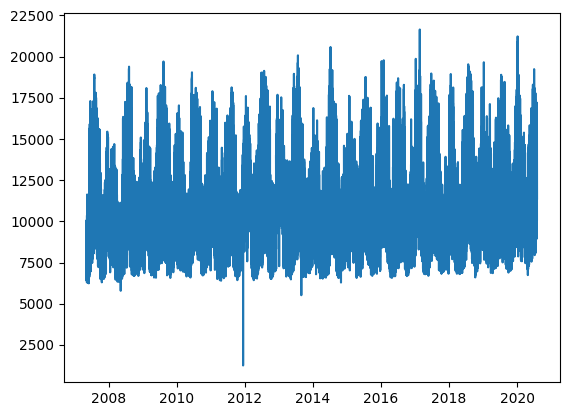

In [27]:
x = df.index
y = df["solar_mw"]

plt.plot(x, y)

<Axes: xlabel='humidity', ylabel='Count'>

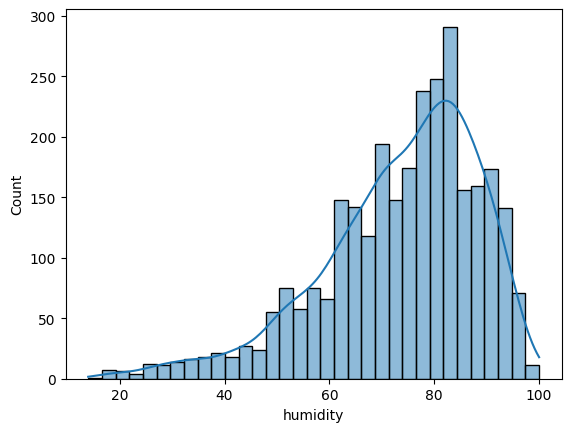

In [28]:
x = df.index
y = df["humidity"]
sns.histplot(y, kde= True)

### Data Preprocessing

In [29]:
df1 = df.copy()

In [30]:
df1["solar_mw"] = df1["solar_mw"].astype("float")

In [31]:
freq = df1["wind-direction"].mode()[0]
df1["wind-direction"].replace("am", freq, inplace=True)
df1["wind-direction"] = df1["wind-direction"].astype("float")
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116117 entries, 2020-08-03 00:00:00 to 2007-05-01 01:00:00
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   solar_mw                     116117 non-null  float64
 1   wind-direction               2920 non-null    float64
 2   wind-speed                   2920 non-null    float64
 3   humidity                     2920 non-null    float64
 4   average-wind-speed-(period)  2919 non-null    float64
 5   average-pressure-(period)    2920 non-null    float64
 6   temperature                  2920 non-null    float64
dtypes: float64(7)
memory usage: 7.1 MB


In [32]:
df2 = df1.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2206 entries, 2020-08-03 00:00:00 to 2020-05-03 02:00:00
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   solar_mw                     2206 non-null   float64
 1   wind-direction               2206 non-null   float64
 2   wind-speed                   2206 non-null   float64
 3   humidity                     2206 non-null   float64
 4   average-wind-speed-(period)  2206 non-null   float64
 5   average-pressure-(period)    2206 non-null   float64
 6   temperature                  2206 non-null   float64
dtypes: float64(7)
memory usage: 137.9 KB


In [33]:
train_rows = int(0.1 * len(df2))
test_df = df2.iloc[:train_rows]
train_df = df2.iloc[train_rows:]
train_df.head()


,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
2020-07-24 20:00:00,13402.0,23.0,12.3,63.0,20.0,29.90,61.0
2020-07-24 19:00:00,13722.0,23.0,12.3,70.0,21.0,29.89,61.0
2020-07-24 18:00:00,13906.0,23.0,12.3,87.0,11.0,29.93,61.0
2020-07-24 17:00:00,13967.0,23.0,12.3,90.0,11.0,29.96,61.0
2020-07-24 16:00:00,13880.0,23.0,8.4,90.0,8.0,29.97,62.0


In [34]:
test_df.head()

,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
2020-08-03 00:00:00,11385.0,27.0,7.5,75.0,8.0,29.82,69.0
2020-08-02 23:00:00,12390.0,27.0,7.5,77.0,5.0,29.85,69.0
2020-08-02 22:00:00,13312.0,27.0,7.5,70.0,0.0,29.89,69.0
2020-08-02 21:00:00,13832.0,27.0,7.5,33.0,0.0,29.91,69.0
2020-08-02 20:00:00,14038.0,27.0,7.5,21.0,3.0,29.89,69.0


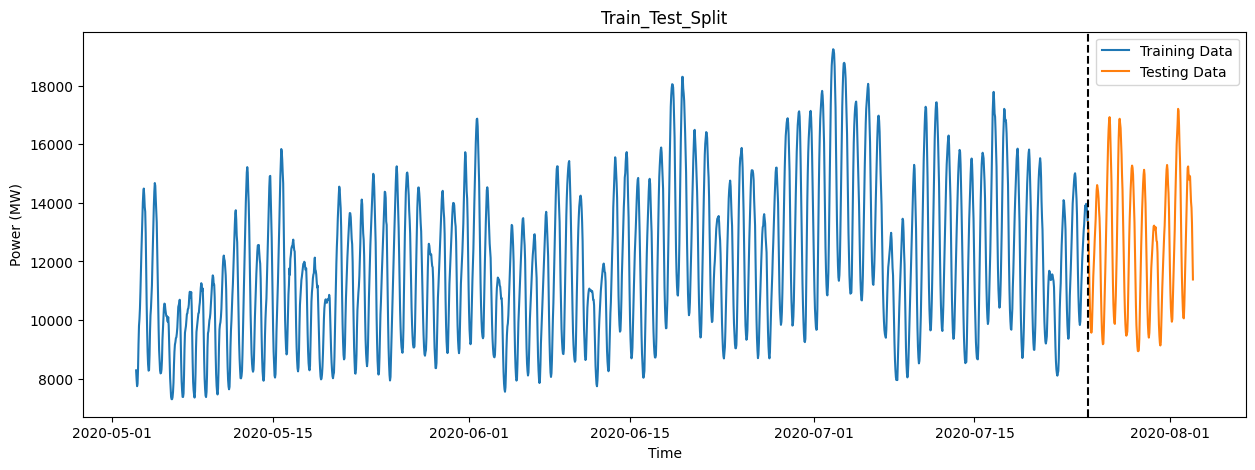

In [35]:
# Tạo hình và trục
fig, ax = plt.subplots(figsize=(15, 5))

# Dữ liệu của tập huấn luyện
x1 = train_df.index
y1 = train_df["solar_mw"]

# Dữ liệu của tập kiểm tra
x2 = test_df.index
y2 = test_df["solar_mw"]

# Vẽ biểu đồ cho dữ liệu tập huấn luyện và tập kiểm tra
ax.plot(x1, y1, label='Training Data')
ax.plot(x2, y2, label='Testing Data')
ax.axvline(train_df.index[0], color= "black", ls= "--")

# Đặt tiêu đề và nhãn trục
ax.set_title('Train_Test_Split')
ax.set_xlabel('Time')
ax.set_ylabel('Power (MW)')

# Thêm chú thích cho biểu đồ
ax.legend()

# Hiển thị biểu đồ
plt.show()


In [36]:
x_train = train_df.drop("solar_mw", axis= 1)
y_train = train_df["solar_mw"]
x_test = test_df.drop("solar_mw", axis= 1)
y_test = test_df["solar_mw"]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1986, 6), (1986,), (220, 6), (220,))

In [37]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [38]:
sc_train = StandardScaler()
sc_test = StandardScaler()

sc_train.fit(x_train)
x_train = sc_train.transform(x_train)
x_test = sc_train.transform(x_test)

sc_test.fit(y_train)
y_train = sc_test.transform(y_train)
y_test = sc_test.transform(y_test)